In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

<h2> Feature Selection on OnlineNewsPopularity </h2>

<h3>Exercise</h3>


1. Load the "OnlineNewsPopularity.csv" dataset 
2. Drop the Column which isn't required


In [2]:
 # read the csv file from the link provided
 # drop the column that is not required from the dataset(url)
data = pd.read_csv("OnlineNewsPopularity.csv")
data.drop(['url'], axis = 1, inplace = True)
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<h3>Exercise</h3>


1. Scale the data using a appropriate scaler and re-asign the column names after scaling.
2. The function below should return scaled result in the form of DataFrame

In [3]:
# hint: Use MinMaxScaler for scaling
def data_scaler(dataset):
    scaler = MinMaxScaler()
    s_data = scaler.fit_transform(dataset.iloc[:, :-1])  # don't scale target column

    # re-assign column names
    scaled_dataset = pd.DataFrame(s_data, columns=dataset.columns[:-1])

    # add target column back to dataset
    scaled_dataset[' shares'] = dataset[' shares']
    
    return scaled_dataset


In [4]:
scaled_data = data_scaler(data)
scaled_data.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.000000,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,593
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.000000,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,711
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.000000,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,1500
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.000000,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,1200
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.000000,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,505
5,1.0,0.380952,0.043663,0.000799,0.00096,0.001074,0.006579,0.017241,0.000000,0.000000,...,0.136364,0.6,0.805000,0.600,0.900000,0.642857,0.607143,0.285714,0.214286,855
6,1.0,0.285714,0.113288,0.000597,0.00096,0.000846,0.069079,0.172414,0.156250,0.000000,...,0.100000,1.0,0.775521,0.500,0.950000,0.000000,0.500000,1.000000,0.000000,556
7,1.0,0.476190,0.116710,0.000619,0.00096,0.000880,0.065789,0.172414,0.156250,0.000000,...,0.100000,1.0,0.757222,0.500,0.950000,1.000000,0.750000,1.000000,0.500000,891
8,1.0,0.428571,0.011447,0.000956,0.00096,0.001287,0.006579,0.000000,0.000000,0.000000,...,0.400000,0.8,0.875000,0.875,0.875000,0.125000,0.500000,0.750000,0.000000,3600
9,1.0,0.380952,0.027260,0.000908,0.00096,0.001226,0.013158,0.008621,0.007812,0.010989,...,0.100000,0.5,0.761905,0.500,0.900000,0.000000,0.500000,1.000000,0.000000,710


5. Perform train_test_split

In [5]:
X = scaled_data.loc[:,:' abs_title_sentiment_polarity']
y = scaled_data[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train =y_train.astype('int')

6. Write a function which returns the list of k-Best features where k being the number of features required

In [6]:
#use chi2
def get_k_best_features(features, tar_col, k):

    # use chi2 to score features based on independence with target variable
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(features, tar_col)

    # get indices of k-best features
    k_best_indices = selector.get_support(indices=True)

    # get names of k-best features
    k_best_features = features.columns[k_best_indices].tolist()

    return k_best_features



Print the results

In [7]:
pd.DataFrame({'Rank': range(1,21),'20 best features': get_k_best_features(X, y, 20)})

,Rank,20 best features
0,1,data_channel_is_lifestyle
1,2,data_channel_is_entertainment
2,3,data_channel_is_bus
3,4,data_channel_is_socmed
4,5,data_channel_is_tech
5,6,data_channel_is_world
6,7,kw_min_min
7,8,kw_min_avg
8,9,weekday_is_monday
9,10,weekday_is_tuesday


<h3>=> Describe about feature selection and explain your code in detail?</h3>

ANS -
**FEATURE SELECTION -**
Selecting a subset of the most relevant features from the dataset to be used in a machine learning model to predict the target variable.

**CODE -**
1. Features, a target variable, and a number of k-best features to select are taken as input.
2. The function initializes a SelectKBest object from the sklearn.feature_selection module with the chi2 scoring function and the value of k.
3. The fit method is called to calculate the chi2 score for each feature.
4. The k_best_indices variable is assigned the indices of the k-best features that were selected.
5. Finally, the code retrieves the names of the k-best features by calling the tolist() method on the columns of the input features that correspond to the k-best indices.
6. The function returns a list of the names of the k-best features.


<h2> Model selection on Algerian_forest_fires_dataset_UPDATE-1 dataset  </h2>
<h3>Exercise (Hint use Ridge and Lasso to compare the models.)</h3>

<p>Your task is to findout which of the above models is best suited for the given dataset and give reasons in this scenario. </p>
<p>Also, you need to give scenarios which each of these Models work better over the other.</p>


1. Load the dataset

In [35]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE-1.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [36]:
df = data.loc[124:] 
df = pd.concat([data.loc[:120], data.loc[125:]])
df['Classes'] = df['Classes  '].str.strip()

In [37]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [38]:
le = LabelEncoder()
le.fit(df['Classes'])
df['Classes'] = le.transform(df['Classes'])
df = df.drop(index=[167])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [39]:
df['Classes'].unique()

array([1, 0, 2])

* Drop the unnecessary columns and use train_test_split

In [40]:
df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes
count,242,242,242,242,242,242,242,242,242,242,242,242,242,241,242.000000
unique,31,4,1,19,62,18,39,171,166,197,105,174,125,8,NaN
top,1,8,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,242,29,10,42,133,8,5,5,8,5,12,130,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.442149
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505940
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [41]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [42]:
df.drop(['day', 'month', 'year', 'Classes  '], axis = 1, inplace = True)

In [43]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,0
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [44]:
X = df.drop('Classes', axis=1)
y = df['Classes']

print(X.dtypes)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

ridge_r2 = {}
lasso_r2 = {}

X

Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
dtype: object


ValueError: could not convert string to float: '14.6 9'

In [45]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

for k in range(1,11):
    X_kbest = get_k_best_features(X, y, k)      # Generated models by incrementing one predictor each loop
    
    X_train, X_test, y_train, y_test = train_test_split(X[X_kbest], y, test_size=0.3, random_state=50)  # train test split
    
    # Ridge model fit
    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_r2[k]= r2_score(y_test, y_pred)  # Stored Ridge R2 score of different models in a dictionary
    
    # Lasso model fit
    lasso = Lasso(alpha=0.001)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_r2[k]= r2_score(y_test, y_pred)  # Stored Lasso R2 score of different models in a dictionary
    
X_train

ValueError: could not convert string to float: '14.6 9'

In [24]:
# Presented R2 scores for both Ridge and Lasso as a dataframe

r2_df = pd.DataFrame.from_dict(ridge_r2, orient='index', columns=['Ridge_R2_Score'])
r2_df = r2_df.rename_axis('No of Features')
r2_df['Lasso_R2_Score'] = lasso_r2.values()
r2_df

,Ridge_R2_Score,Lasso_R2_Score
No of Features,,
1,0.507803,0.507809
2,0.431725,0.416345
3,0.426222,0.441711
4,0.430771,0.447772
5,0.438561,0.447780
6,0.466721,0.476532
7,0.606122,0.609200
8,0.610463,0.611824
9,0.665969,0.656533


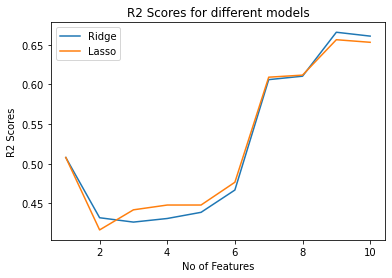

In [25]:
# Visual representation of R2 scores for both Ridge and Lasso

plt.plot(ridge_r2.keys(), ridge_r2.values(), label = 'Ridge')
plt.plot(lasso_r2.keys(), lasso_r2.values(), label = 'Lasso')
plt.title('R2 Scores for different models')
plt.xlabel('No of Features')
plt.ylabel('R2 Scores')
plt.legend()

It is clearly evident from both, R2 scores table and the plot, that **R2 score is highest for model with 9 predictors**. Hence, model with 9 predictors is best suited for the given dataset.

If our case had a requirement to use at max 6 best features, in that case, taking the one best feature would have given us best results.

The 9 best predictors are represented below.

In [28]:
pd.DataFrame({'Rank': range(1,10),'9 best features': get_k_best_features(X, y, 9)})

,Rank,9 best features
0,1,Temperature
1,2,RH
2,3,Rain
3,4,FFMC
4,5,DMC
5,6,DC
6,7,ISI
7,8,BUI
8,9,FWI


**RIDGE VS LASSO MODEL**

The main difference between Ridge and Lasso regression is in the way they handle multicollinearity.

Ridge regression shrinks the coefficients towards zero but does not necessarily eliminate them, while Lasso regression can force some of the coefficients to be exactly zero, effectively performing feature selection.

Ridge regression is generally used when all the variables in the dataset are believed to be important predictors of the response variable, while Lasso regression is often used when there are many irrelevant or redundant predictors in the dataset, and only a subset of them are expected to be important.